In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [0]:
dailyEnergy = pd.read_excel('/content/drive/My Drive/dailyEnergyWithFeatures.xlsx')
dailyEnergy['weekday'] = dailyEnergy['TimeReviewed'].dt.dayofweek
dailyEnergy['day_type'] = np.zeros(len(dailyEnergy))
dailyEnergy['day_type'][(dailyEnergy['weekday']==5)|(dailyEnergy['weekday']==6)|(dailyEnergy['TimeReviewed']=='2017-12-26')|(dailyEnergy['TimeReviewed']=='2018-1-1')|(dailyEnergy['TimeReviewed']=='2018-1-14')|(dailyEnergy['TimeReviewed']=='2018-1-26')|(dailyEnergy['TimeReviewed']=='2018-5-1')|(dailyEnergy['TimeReviewed']=='2018-8-15')|(dailyEnergy['TimeReviewed']=='2018-10-2')|(dailyEnergy['TimeReviewed']=='2018-12-25')|(dailyEnergy['TimeReviewed']=='2019-1-1')|(dailyEnergy['TimeReviewed']=='2019-1-14')|(dailyEnergy['TimeReviewed']=='2019-1-26')|(dailyEnergy['TimeReviewed']=='2019-5-1')]=1
dailyEnergy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
TimeReviewed                   505 non-null datetime64[ns]
Solar_Power_Consumption(Kw)    505 non-null float64
Temp( C)                       505 non-null float64
EmployeeCount                  505 non-null int64
weekday                        505 non-null int64
day_type                       505 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 23.8 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
dailyEnergy.to_csv('/content/drive/My Drive/dailyEnergy.csv')
dataframe = pd.read_csv('/content/drive/My Drive/dailyEnergy.csv',usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

**Finding the correlation between variables**

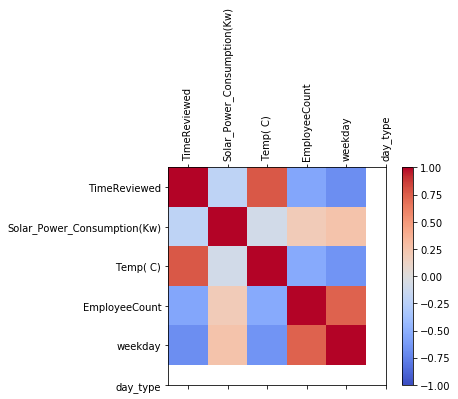

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr = dailyEnergy.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dailyEnergy.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dailyEnergy.columns)
ax.set_yticklabels(dailyEnergy.columns)
plt.show()

**Correlation between each variable**
1. Red - shows that the variables are highly dependent on each other(+ve correlation)
2. Blue- perfect -ve correlation
3. correlation of each feature with itself, which is always 1, ie(darl red)
4.so that is why this type of graph always has the red diagonal from the upper left to the lower right
5.when there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray
6. *TimeReviewed & Temperature*- are correlated to each other,
     *Employee Count and weekday* are correlated 
     *Employee Count and Solar energy generation are weakly correlated to    each other
     *Weekday and Solar Energy *are week correlated
     


In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [0]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
 - 2s - loss: 0.1941 - acc: 0.0120
Epoch 2/100
 - 1s - loss: 0.0881 - acc: 0.0000e+00
Epoch 3/100
 - 1s - loss: 0.0834 - acc: 0.0000e+00
Epoch 4/100
 - 1s - loss: 0.0811 - acc: 0.0000e+00
Epoch 5/100
 - 1s - loss: 0.0796 - acc: 0.0000e+00
Epoch 6/100
 - 1s - loss: 0.0782 - acc: 0.0000e+00
Epoch 7/100
 - 1s - loss: 0.0768 - acc: 0.0000e+00
Epoch 8/100
 - 1s - loss: 0.0758 - acc: 0.0000e+00
Epoch 9/100
 - 1s - loss: 0.0752 - acc: 0.0000e+00
Epoch 10/100
 - 1s - loss: 0.0744 - acc: 0.0000e+00
Epoch 11/100
 - 1s - loss: 0.0742 - acc: 0.0000e+00
Epoch 12/100
 - 1s - loss: 0.0734 - acc: 0.0000e+00
Epoch 13/100
 - 1s - loss: 0.0730 - acc: 0.0060
Epoch 14/100
 - 1s - loss: 0.0725 - acc: 0.0030
Epoch 15/100
 - 1s - loss: 0.0725 - acc: 0.0060
Epoch 16/100
 - 1s - loss: 0.0724 - acc: 0.0030
Epoch 17/100
 - 1s - loss: 0.0723 - acc: 0.0060
Epoch 18/100
 - 1s - loss: 0.0723 - acc: 0.0030
Epoch 19/100
 - 1s - loss: 0.0721 - acc: 0.0030
Epoch 20/100
 - 1s - loss: 0.0716 - acc: 0.0060
Epoch

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])



In [0]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 4050.17 RMSE
Test Score: 3831.29 RMSE


In [0]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


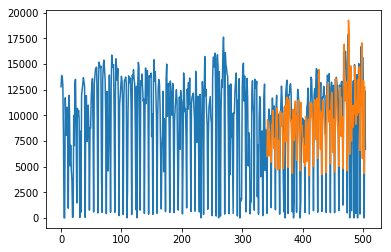

In [0]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()